Quante evidenze archeologiche di epoca romana sono presenti in Italia?

Curiosando sul [Catalogo generale dei Beni Culturali](https://catalogo.beniculturali.it/) mi aspettavo di trovare una risposta ma non è stato così. Già solo accedendo al portale, senza applicare nessun tipo di filtro, effettuando uno zoom sull'area dei Campi Flegrei mi ritrovo nella situazione che segue.

<p align="center">
  <img width="100%" height="800px" src="zoom_campi_flegrei.png">
</p>

E' presente il solo [Castello di Baia](https://www.campiflegreionline.it/Castello_di_Baia.html) in questa area, secondo il catalogo, ma nella realtà in quest'area possiamo trovare:
- la [Piscina Mirabilis](https://piscinamirabilisbacoli.it/it)
- la [Casina Vanvitelliana](https://www.prolococittadibacoli.it/casina-vanvitelliana/)
- [Baia sommersa](https://www.baiasommersa.it/)
- il [Tempio di Serapide](http://www.pafleg.it/it/4388/localita/67/macellum-tempio-di-serapide)
- il [Parco archeologico del Pausilypon](https://www.areamarinaprotettagaiola.it/pausilypon)

Solo per citare i luoghi che conosco per averli visitati direttamente, ma ce ne sono tanti altri.

Così ho deciso di usare i superpoteri di Python e [OpenStreetMap](https://www.openstreetmap.org/) per darmi una risposta.

## Prima di iniziare


### Librerie
Per raggiungere l'obiettivo userò le librerie che seguono.

In [1]:
from pathlib import Path
import geopandas as gpd
from matplotlib import pyplot as plt
import osmnx as ox

### Fonti dati
Userò in questo piccolo esercizio quattro linee, ma dobbiamo immaginarci di essere di fronte alla generica situazione in cui abbiamo una lista di *N* linee e non possiamo di certo metterci a misurarle tutte.


In [7]:
main_folder = Path.cwd().parent.parent.parent.parent.joinpath('sample_data')
municipalities = main_folder.joinpath('Com01012023_g').joinpath('Com01012023_g_WGS84.shp')

municipalities_gdf = gpd.read_file(municipalities)
target_region = municipalities_gdf[municipalities_gdf['COD_REG']==15]

target_region

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,geometry
4951,4,15,61,0,61,61001,061001,Ailano,NaN,0,20581.746400,"POLYGON ((935884.250 4596523.358, 935960.562 4..."
4952,4,15,61,0,61,61002,061002,Alife,NaN,0,40841.207949,"POLYGON ((943908.260 4595263.359, 944155.758 4..."
4953,4,15,61,0,61,61003,061003,Alvignano,NaN,0,28587.631245,"POLYGON ((948082.841 4583741.452, 948152.277 4..."
4954,4,15,61,0,61,61004,061004,Arienzo,NaN,0,17505.659927,"POLYGON ((963485.135 4558861.149, 963848.883 4..."
4955,4,15,61,0,61,61005,061005,Aversa,NaN,0,16771.036732,"POLYGON ((938147.678 4550291.193, 938711.915 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5496,4,15,65,0,65,65154,065154,Vallo della Lucania,NaN,0,30456.305184,"POLYGON ((1030315.533 4474665.799, 1030374.783..."
5497,4,15,65,0,65,65155,065155,Valva,NaN,0,22401.620108,"POLYGON ((1028982.017 4534178.208, 1029020.017..."
5498,4,15,65,0,65,65156,065156,Vibonati,NaN,0,22995.407185,"POLYGON ((1061095.377 4462832.928, 1061652.873..."
5499,4,15,65,0,65,65157,065157,Vietri sul Mare,NaN,0,15182.573826,"POLYGON ((983686.245 4519627.329, 983692.046 4..."


**NB**: ho usato *[parallel_offset](https://shapely.readthedocs.io/en/stable/manual.html#object.parallel_offset)* solo per motivi grafici. Le linee che ho usato in questo esercizio sono pezzi di una unica linea più lunga che rappresentati sarebbero andati in sovrapposizione nel grafico rendendo impossibile la loro visualizzazione.

## Contenuti
- [Misurare](#Misurare)
- [Conclusione](#Conclusione)

# Misurare!
Se avessimo solo quattro linee in una lista sarebbe abbastanza semplice capire quale è quella meno lunga:

In [3]:
line_measure = [line_0.length, line_1.length, line_2.length, line_3.length]
line_measure

[656.716578077637, 299.7932485603402, 402.9046946828671, 534.4664886738693]

Usando l'attributo **[length](https://shapely.readthedocs.io/en/stable/manual.html#object.length)** risulta abbastanza immediato capire che la linea più breve è quella in posizione 1 che nemmeno a farlo apposta è `line_1`. Ma vediamo come possiamo risolvere il caso più generico.

In [4]:
line_list.sort(key=lambda x: x.length, reverse=False)
line_list

[<LINESTRING (461179.666 4507148.788, 461217.568 4507181.537, 461236.328 4507...>,
 <LINESTRING (461179.666 4507148.788, 461217.568 4507181.537, 461236.328 4507...>,
 <LINESTRING (461179.666 4507148.788, 461217.568 4507181.537, 461236.328 4507...>,
 <LINESTRING (461179.666 4507148.788, 461217.568 4507181.537, 461236.328 4507...>]

Proprio usando `length` ho raggiunto lo scopo di questo piccolo articolo. Ho riordinato la lista di linee usando la **[lambda function](https://www.w3schools.com/python/python_lambda.asp)** in accoppiata con l'attributo visto in precedenza.

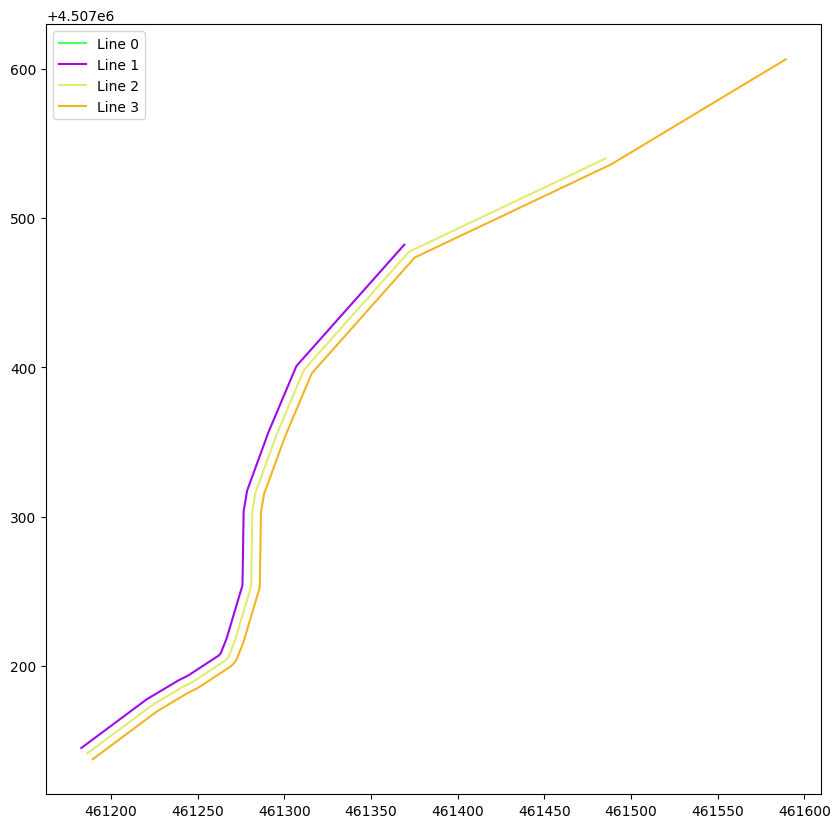

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

for position in range(len(line_list)):
    distance = position * 5
    color = f'{"%06x" % random.randint(0, 0xFFFFFF)}'
    plt.plot(*line_list[position].parallel_offset(distance=distance).xy, label=f'Line {position}', color=f'#{color}')

    plt.legend()

In [6]:
smallest_line = line_list[0]
smallest_line.wkt

'LINESTRING (461179.6655721677 4507148.788223281, 461217.56786209624 4507181.537033379, 461236.3280996226 4507194.537878151, 461241.7247760045 4507197.640095252, 461258.8379542616 4507210.660701941, 461261.9432857035 4507219.791508417, 461270.90091201715 4507254.590010401, 461271.56385885156 4507303.918307676, 461273.67536588735 4507318.460376316, 461286.2322009634 4507358.346460313, 461302.55653224624 4507403.197152592)'

# Conclusione

Ora noi sappiamo che è la linea in posizione 0, della nuova lista riordinata, ad essere quella meno lunga. Quello che hai visto è uno dei metodi per arrivare all'obiettivo, ce ne saranno sicuramente altri.